In [1]:
!pip install scikit-learn

In [2]:
import yfinance as yf

df = yf.Ticker("2603.TW").history(period="10y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-29 00:00:00+08:00,17.696627,17.797750,17.595505,17.696627,3287280,0.0,0.0
2013-12-02 00:00:00+08:00,17.848313,17.848313,17.646066,17.696627,1621499,0.0,0.0
2013-12-03 00:00:00+08:00,17.696625,17.696625,17.393255,17.494379,1809480,0.0,0.0
2013-12-04 00:00:00+08:00,17.292134,17.696628,17.292134,17.544943,1618026,0.0,0.0
2013-12-05 00:00:00+08:00,17.544941,17.696626,17.393256,17.443817,1768671,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-23 00:00:00+08:00,112.500000,113.500000,111.500000,112.000000,8390398,0.0,0.0
2023-11-24 00:00:00+08:00,113.000000,113.000000,111.500000,113.000000,6080018,0.0,0.0
2023-11-27 00:00:00+08:00,113.500000,114.000000,113.000000,113.500000,8371666,0.0,0.0


In [3]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-23 00:00:00+08:00,112.5,113.5,111.5,112.0,8390398,0.0,0.0
2023-11-24 00:00:00+08:00,113.0,113.0,111.5,113.0,6080018,0.0,0.0
2023-11-27 00:00:00+08:00,113.5,114.0,113.0,113.5,8371666,0.0,0.0
2023-11-28 00:00:00+08:00,113.5,115.0,113.0,114.0,11771528,0.0,0.0
2023-11-29 00:00:00+08:00,114.0,114.0,112.0,112.0,12595231,0.0,0.0


In [4]:
df=df.filter(["Close"])
df=df.rename(columns={"Close":"GT"})
df

,GT
Date,
2013-11-29 00:00:00+08:00,17.696627
2013-12-02 00:00:00+08:00,17.696627
2013-12-03 00:00:00+08:00,17.494379
2013-12-04 00:00:00+08:00,17.544943
2013-12-05 00:00:00+08:00,17.443817
...,...
2023-11-23 00:00:00+08:00,112.000000
2023-11-24 00:00:00+08:00,113.000000
2023-11-27 00:00:00+08:00,113.500000


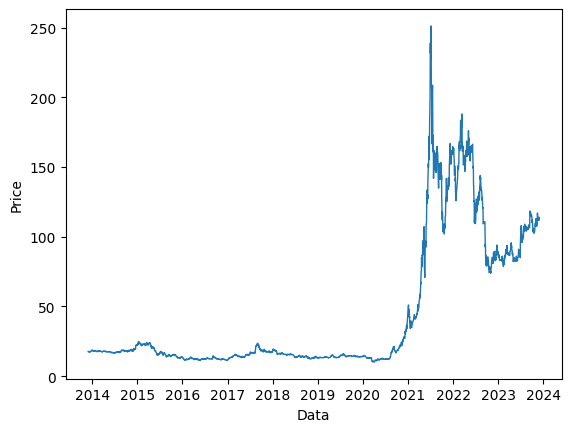

In [5]:
import matplotlib.pyplot as plt

# plt.style.use("seaborn-darkgrid")
plt.xlabel("Data")
plt.ylabel("Price")
plt.plot(df["GT"],linewidth=1)
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.03106605],
       [0.03106605],
       [0.03022706],
       ...,
       [0.42848936],
       [0.43056352],
       [0.42226687]])

# split data

In [7]:
import numpy as np

MOVING_SIZE=60

all_x,all_y=[],[]

for i in range (len(scaled_prices)-MOVING_SIZE):
    x=scaled_prices[i:i+MOVING_SIZE]
    y=scaled_prices[i+MOVING_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x,all_y=np.array(all_x),np.array(all_y)
print(all_x.shape)
print(all_y.shape)

(2381, 60, 1)
(2381, 1)


In [8]:
SPLIT=0.8

train_ds_size=round(all_x.shape[0]*SPLIT)
train_x,train_y=all_x[:train_ds_size],all_y[:train_ds_size]
test_x,test_y=all_x[train_ds_size:],all_y[train_ds_size:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1905, 60, 1)
(1905, 1)
(476, 60, 1)
(476, 1)


# model

In [9]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss="mean_squared_error")

# train model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)
model.fit(train_x,train_y,validation_split=0.2,callbacks=[callback],epochs=1000)

Epoch 1/1000
48/48 [==============================] - 17s 36ms/step - loss: 8.2873e-05 - val_loss: 0.0055
Epoch 2/1000
48/48 [==============================] - 1s 11ms/step - loss: 1.1399e-05 - val_loss: 0.0036
Epoch 3/1000
48/48 [==============================] - 0s 10ms/step - loss: 9.8081e-06 - val_loss: 0.0032
Epoch 4/1000
48/48 [==============================] - 0s 10ms/step - loss: 8.9814e-06 - val_loss: 0.0027
Epoch 5/1000
48/48 [==============================] - 1s 11ms/step - loss: 7.1989e-06 - val_loss: 0.0030
Epoch 6/1000
48/48 [==============================] - 0s 10ms/step - loss: 8.0863e-06 - val_loss: 0.0027
Epoch 7/1000
48/48 [==============================] - 1s 10ms/step - loss: 6.6507e-06 - val_loss: 0.0025
Epoch 8/1000
48/48 [==============================] - 0s 10ms/step - loss: 6.1966e-06 - val_loss: 0.0030
Epoch 9/1000
48/48 [==============================] - 1s 10ms/step - loss: 6.1366e-06 - val_loss: 0.0018
Epoch 10/1000
48/48 [==============================] -

# evaluate model

In [12]:
preds=model.predict(test_x)
preds

15/15 [==============================] - 1s 4ms/step


array([[0.62442243],
       [0.59226185],
       [0.6134509 ],
       [0.6283832 ],
       [0.6269593 ],
       [0.6196198 ],
       [0.63024175],
       [0.62387115],
       [0.6188487 ],
       [0.61845696],
       [0.6207437 ],
       [0.63917005],
       [0.64256173],
       [0.63584507],
       [0.62158114],
       [0.62529427],
       [0.6279262 ],
       [0.63734925],
       [0.6264979 ],
       [0.6074757 ],
       [0.59485316],
       [0.5689865 ],
       [0.55626404],
       [0.58333045],
       [0.5620276 ],
       [0.5608705 ],
       [0.53989154],
       [0.54582304],
       [0.50700563],
       [0.5029924 ],
       [0.4798079 ],
       [0.4929969 ],
       [0.5445658 ],
       [0.5704023 ],
       [0.571652  ],
       [0.58508056],
       [0.5834221 ],
       [0.5765862 ],
       [0.58555335],
       [0.59316534],
       [0.59375554],
       [0.63032025],
       [0.6574328 ],
       [0.63841   ],
       [0.6481659 ],
       [0.63253105],
       [0.6407157 ],
       [0.672

In [13]:
preds=scaler.inverse_transform(preds)
preds

array([[160.73189 ],
       [152.97922 ],
       [158.08707 ],
       [161.68668 ],
       [161.34343 ],
       [159.57414 ],
       [162.13469 ],
       [160.59898 ],
       [159.38826 ],
       [159.29384 ],
       [159.84508 ],
       [164.28696 ],
       [165.10457 ],
       [163.48544 ],
       [160.04695 ],
       [160.94205 ],
       [161.57649 ],
       [163.84804 ],
       [161.23221 ],
       [156.64668 ],
       [153.60388 ],
       [147.36842 ],
       [144.30153 ],
       [150.8262  ],
       [145.6909  ],
       [145.41197 ],
       [140.35475 ],
       [141.7846  ],
       [132.42723 ],
       [131.4598  ],
       [125.87092 ],
       [129.05026 ],
       [141.48154 ],
       [147.70973 ],
       [148.01097 ],
       [151.24808 ],
       [150.8483  ],
       [149.20041 ],
       [151.36205 ],
       [153.197   ],
       [153.33928 ],
       [162.15361 ],
       [168.6894  ],
       [164.10373 ],
       [166.4555  ],
       [162.68655 ],
       [164.65956 ],
       [172.4

<function matplotlib.pyplot.show(close=None, block=None)>

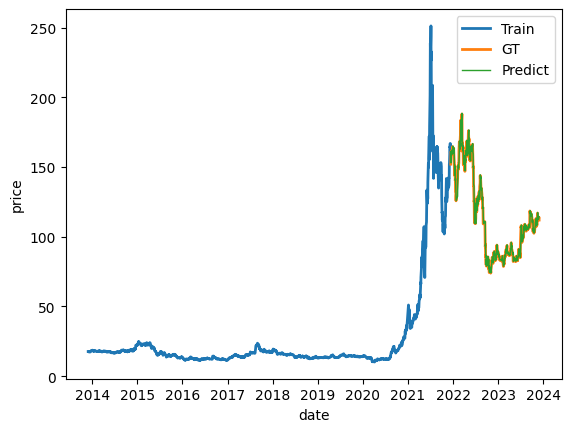

In [14]:
# MOVING_SIZE=60

train_df=df[:train_ds_size + MOVING_SIZE]
test_df=df[train_ds_size + MOVING_SIZE:]
test_df=test_df.assign(Predict=preds)

plt.xlabel("date")
plt.ylabel("price")
plt.plot(train_df["GT"],linewidth=2)
plt.plot(test_df["GT"],linewidth=2)
plt.plot(test_df["Predict"],linewidth=1)
plt.legend(["Train","GT","Predict"])
plt.show

# check

<function matplotlib.pyplot.show(close=None, block=None)>

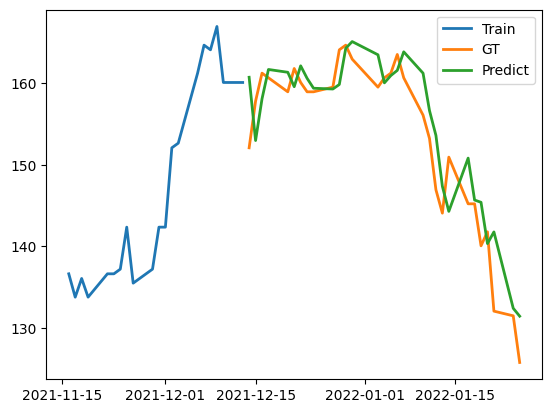

In [15]:
plt.plot(train_df["GT"][-20:],linewidth=2)
plt.plot(test_df["GT"][:30],linewidth=2)
plt.plot(test_df["Predict"][:30],linewidth=2)
plt.legend(["Train","GT","Predict"])
plt.show

#predict疑似只是把真實股價平移

<function matplotlib.pyplot.show(close=None, block=None)>

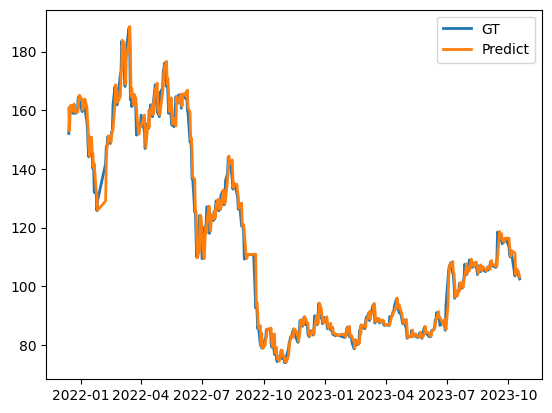

In [22]:
# plt.plot(train_df["GT"][-20:],linewidth=2)
plt.plot(test_df["GT"][:-30],linewidth=2)
plt.plot(test_df["Predict"][:-30],linewidth=2)
plt.legend(["GT","Predict"])
plt.show

#predict疑似只是把真實股價平移

In [16]:
check_df=test_df.assign(Shifted=test_df["GT"].shift(1))
check_df.iat[0,-1]=train_df.iat[-1,-1]
check_df

,GT,Predict,Shifted
Date,,,
2021-12-14 00:00:00+08:00,152.088974,160.731888,160.093674
2021-12-15 00:00:00+08:00,157.806610,152.979218,152.088974
2021-12-16 00:00:00+08:00,161.237198,158.087067,157.806610
2021-12-17 00:00:00+08:00,160.665421,161.686676,161.237198
2021-12-20 00:00:00+08:00,158.950134,161.343430,160.665421
...,...,...,...
2023-11-23 00:00:00+08:00,112.000000,112.367569,112.000000
2023-11-24 00:00:00+08:00,113.000000,112.321304,112.000000
2023-11-27 00:00:00+08:00,113.500000,113.306351,113.000000


# RMSE

In [17]:
from sklearn.metrics import mean_squared_error

pred_rmse=mean_squared_error(check_df["GT"],check_df["Predict"],squared=False)
pred_cvrmse=pred_rmse/ check_df["GT"].mean()*100
pred_cvrmse


3.0620412484542876

In [18]:
shift_rmse=mean_squared_error(check_df["GT"],check_df["Shifted"],squared=False)
shift_cvrmse=shift_rmse/ check_df["GT"].mean()*100
shift_cvrmse

3.0402073393540947